# AnálIse 1: Arquivo alucar.csv: analisando as vendas

In [1]:
# importando o Pandas:
import pandas as pd

# importando o arquivo .csv:
dfa = pd.read_csv('dados/alucar.csv', sep=',')
dfa.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


## Análise inicial

In [2]:
# verificando a quantidade de linhas e colunas
dfa.shape

(24, 2)

In [3]:
# verificando se há dados nulos (NaN)
dfa.isna().sum().sum()

0

In [4]:
# verificando os dtypes das colunas
dfa.dtypes

mes       object
vendas     int64
dtype: object

In [5]:
# convertendo a coluna 'mes' para o dtype datetime
dfa['mes'] = pd.to_datetime(dfa['mes'])
dfa.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

### Importando os pacotes

In [6]:
# importando o seaborn e matplotlib:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# mostrando a versão do seaborn:
print(sns.__version__)

0.11.2


## Plotando e editando o gráfico tempo x venda

Customizando a exibição do gráfico

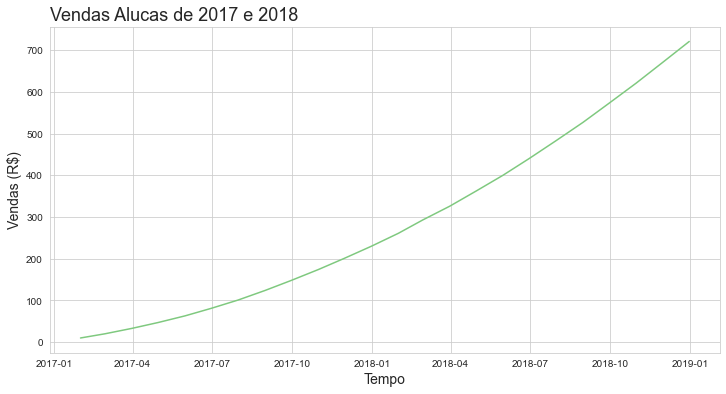

In [7]:
# customizando:
sns.set_palette('Accent')  # paleta de cores
sns.set_style('whitegrid')  # grid

# plot:
ax = sns.lineplot(x='mes', y='vendas', data=dfa)

# customizando a variável: 
ax.figure.set_size_inches(12, 6)  # tamanho da figura
ax.set_title('Vendas Alucas de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)  # xlabel
ax.set_ylabel('Vendas (R$)', fontsize=14)  # ylabel
ax = ax  # isso é feito pra tirar a informação Text(...) que aparece na tela quando alteramos as labels

# Decompondo as vendas

Descobrir o quanto aumentou/diminuiu de um mês para o outro

In [8]:
dfa.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


## Criando a nova coluna 'aumento' -> Aumento das Vendas

In [9]:
dfa['aumento'] = dfa['vendas'].diff()  
# ^ cria uma nova coluna que contém a diferença entre o elemento na coluna 'vendas' pelo de cima
dfa.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


## Plotando o gráfico aumento x tempo

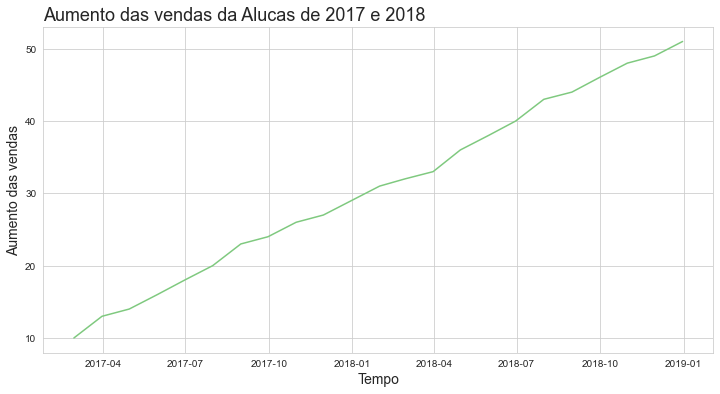

In [10]:
# customizando:
sns.set_palette('Accent')  # paleta de cores
sns.set_style('whitegrid')  # grid

# plot:
ax = sns.lineplot(x='mes', y='aumento', data=dfa)

# customizando a variável: 
ax.figure.set_size_inches(12, 6)  # tamanho da figura
ax.set_title('Aumento das vendas da Alucas de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)  # xlabel
ax.set_ylabel('Aumento das vendas', fontsize=14)  # ylabel
ax = ax  # isso é feito pra tirar a informação Text(...) que aparece na tela quando alteramos as labels

### Criando uma função para plotar os gráficos no padrão acima

Para ficar organizado e economizar código

In [11]:
def plotar(x, y, data, titulo, xlabel, ylabel):
    # customizando:
    sns.set_palette('Accent')  # paleta de cores
    sns.set_style('whitegrid')  # grid

    # plot:
    ax = sns.lineplot(x=x, y=y, data=data)

    # customizando a variável: 
    ax.figure.set_size_inches(12, 6)  # tamanho da figura
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)  # xlabel
    ax.set_ylabel(ylabel, fontsize=14)  # ylabel
    ax = ax  # isso é feito pra tirar a informação Text(...) que aparece na tela quando alteramos as labels

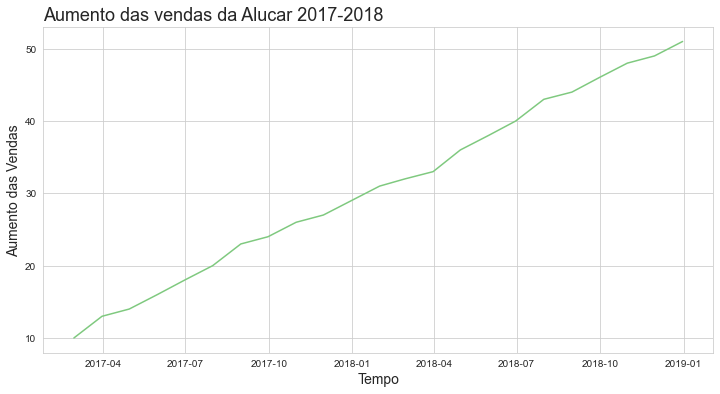

In [12]:
# chamando a função
plotar('mes', 'aumento', dfa, 'Aumento das vendas da Alucar 2017-2018', 'Tempo', 'Aumento das Vendas')

## Criando a nova coluna 'aceleração' -> Aceleração do aumento

In [13]:
dfa['aceleração'] = dfa['aumento'].diff()
dfa.head()

,mes,vendas,aumento,aceleração
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


### Plotando:

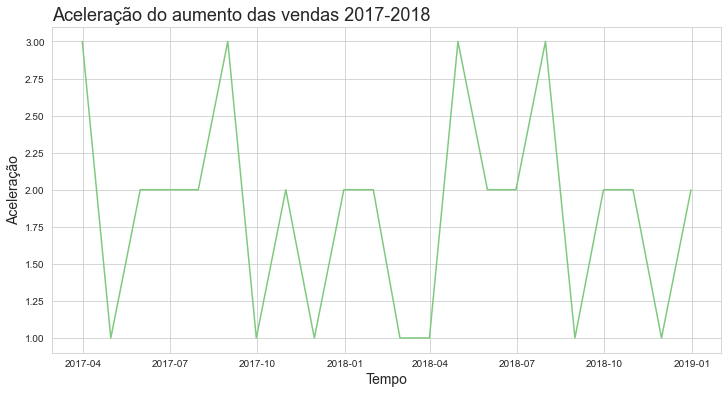

In [14]:
plotar('mes', 'aceleração', dfa, 'Aceleração do aumento das vendas 2017-2018', 'Tempo', 'Aceleração')

# Juntando os três gráficos 

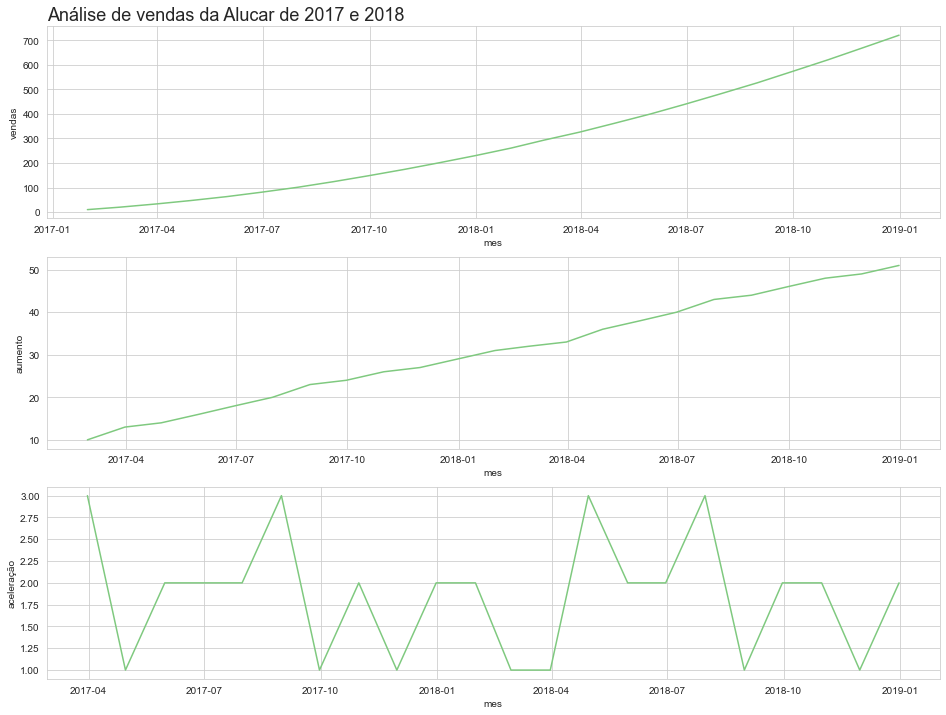

In [15]:
plt.figure(figsize=(16, 12))  # cria a figura e define seu tamanho
ax = plt.subplot(3, 1, 1)  # ax é um subplot
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')  # título do plot inteiro
sns.lineplot(x='mes', y='vendas', data=dfa)  # primeiro gráfico, dentro do primeiro subplot
ax = plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data=dfa)  # segundo gráfico, dentro do segundo subplot
ax = plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleração', data=dfa)  # terceiro gráfico, dentro do terceiro subplot
ax = ax  # pra tirar o Text(...) etc

### Criando uma função que contenha 3 gráficos (para comparar)

In [16]:
def plot_comparar(x, y1, y2, y3, data, titulo):    
    plt.figure(figsize=(16, 12))  # cria a figura e define seu tamanho
    ax = plt.subplot(3, 1, 1)  # ax é um subplot
    # ^ os argumentos da função acima signifcam que: a figura tem 3 linhas, 1 coluna, e esse subplot está na posição 1
    ax.set_title(titulo, fontsize=18, loc='left')  # título do plot inteiro
    sns.lineplot(x=x, y=y1, data=data)  # primeiro gráfico, dentro do primeiro subplot
    ax = plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=data)  # segundo gráfico, dentro do segundo subplot
    ax = plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=data)  # terceiro gráfico, dentro do terceiro subplot
    ax = ax  # pra tirar o Text(...) etc

#### Chamando a função:

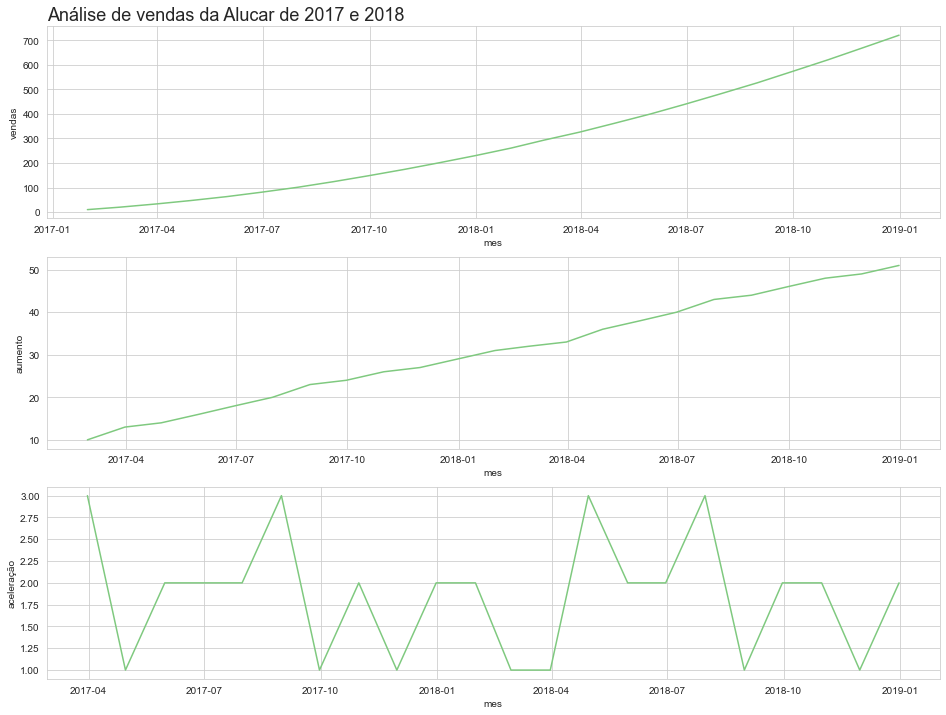

In [17]:
plot_comparar('mes', 'vendas', 'aumento', 'aceleração', dfa, 'Análise de vendas da Alucar de 2017 e 2018')

# Autocorrelação

## Autocorrelação das vendas:

O coeficiente de correlação vai de -1 a 1

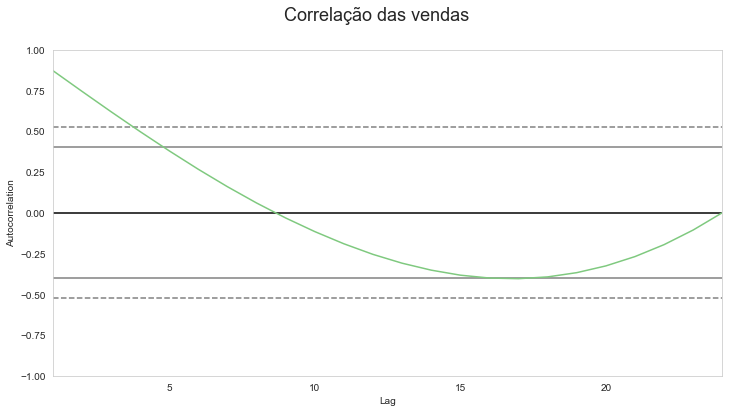

In [18]:
# importando a função
from pandas.plotting import autocorrelation_plot

#plotando
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas', fontsize=18)
autocorrelation_plot(dfa['vendas'])
ax = ax

## Autocorrelação do aumento:

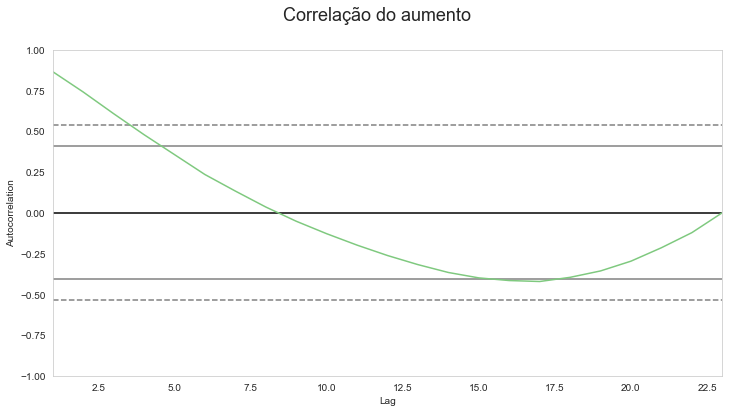

In [19]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento', fontsize=18)
autocorrelation_plot(dfa['aumento'][1:])
ax = ax

## Autocorrelação da aceleração:

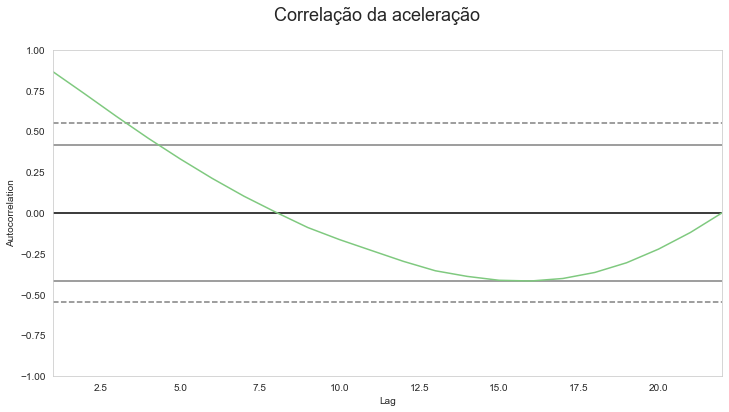

In [20]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da aceleração', fontsize=18)
autocorrelation_plot(dfa['aumento'][2:])
ax = ax

# Análise: assinantes

Assinando assinantes da newsletter

## Importando o novo csv:

In [21]:
dfas = pd.read_csv('dados/newsletter_alucar.csv')
dfas.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


## Análise básica inicial:

In [22]:
# verificando os dtypes:
dfas.dtypes

mes           object
assinantes     int64
dtype: object

In [23]:
# convertendo o 'mes' para datetime:
dfas['mes'] = pd.to_datetime(dfas['mes'])
dfas.dtypes  # conferindo pra ver se mudou

mes           datetime64[ns]
assinantes             int64
dtype: object

In [24]:
print(f'Quantidade de linhas e colunas: {dfas.shape}')
print(f'Quantidade de dados nulos: {dfas.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


## Decomposição com diff()

Usado para analisar o crescimento/variação em relação à linha anterior

In [25]:
# aplicando a função diff()
dfas['aumento'] = dfas['assinantes'].diff()
dfas['aceleração'] = dfas['aumento'].diff()
dfas.tail()  # mostra o final do DF

,mes,assinantes,aumento,aceleração
19,2018-08-31,426,16.0,-4.0
20,2018-09-30,437,11.0,-5.0
21,2018-10-31,444,7.0,-4.0
22,2018-11-30,449,5.0,-2.0
23,2018-12-31,454,5.0,0.0


## Plotando o gráfico da coluna assinantes

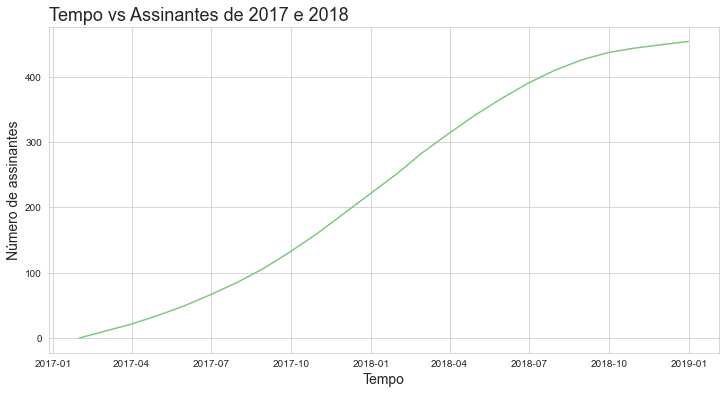

In [26]:
plotar('mes', 'assinantes', dfas, 'Tempo vs Assinantes de 2017 e 2018', 'Tempo', 'Número de assinantes')

## Plotando o plot de comparação

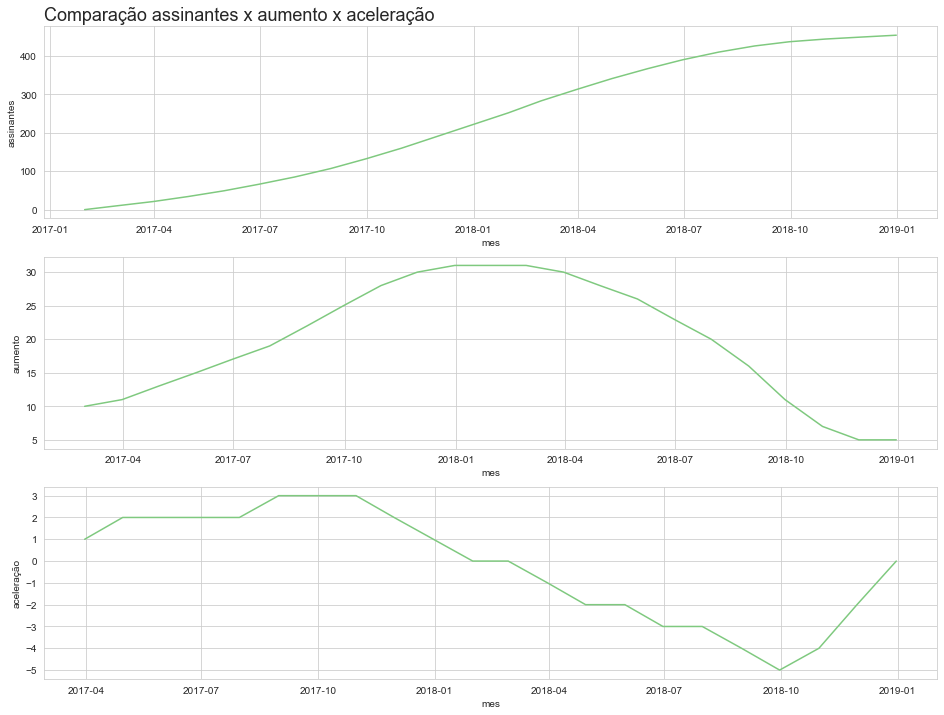

In [27]:
plot_comparar('mes', 'assinantes', 'aumento', 'aceleração', dfas, 'Comparação assinantes x aumento x aceleração')

# Análise: chocolura

Analisando as vendas da chocolura (empresa de chocolates)

In [28]:
dfc = pd.read_csv('dados/chocolura.csv')
dfc.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


## Análise inicial:

In [29]:
dfc.dtypes

mes       object
vendas     int64
dtype: object

In [30]:
# convertendo o 'mes' para datetime:
dfc['mes'] = pd.to_datetime(dfc['mes'])
dfc.dtypes  # conferindo pra ver se mudou

mes       datetime64[ns]
vendas             int64
dtype: object

In [31]:
print(f'Quantidade de linhas e colunas: {dfas.shape}')
print(f'Quantidade de dados nulos: {dfas.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 4)
Quantidade de dados nulos: 3


## Decompondo:

In [32]:
dfc['aumento'] = dfc['vendas'].diff()
dfc['aceleração'] = dfc['aumento'].diff()
dfc.head()

,mes,vendas,aumento,aceleração
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


## Gráfico de comparação:

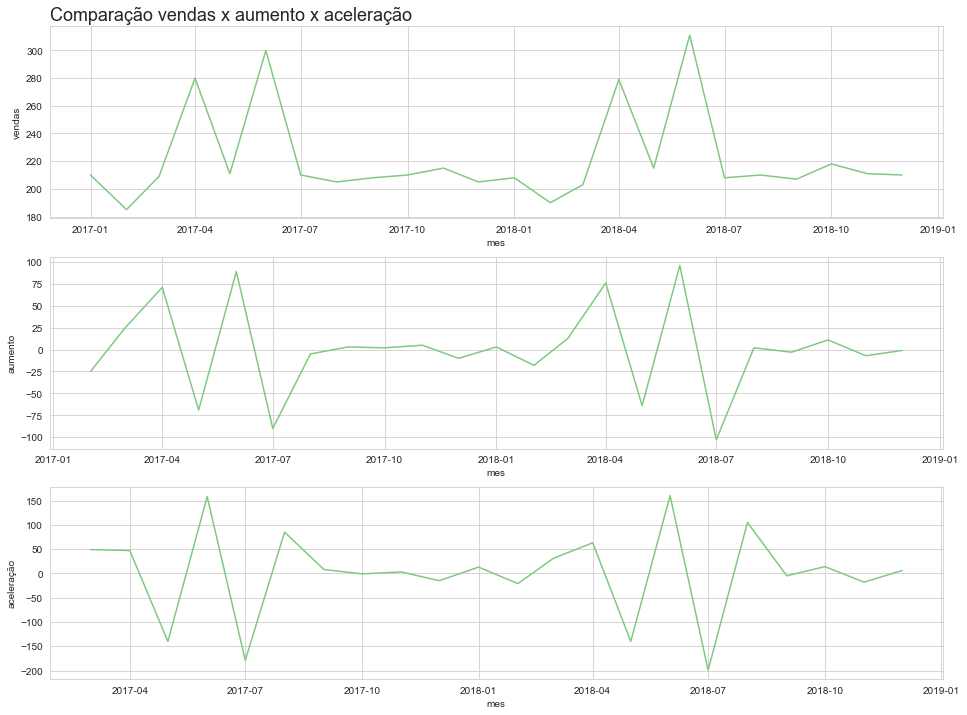

In [33]:
plot_comparar('mes', 'vendas', 'aumento', 'aceleração', dfc, 'Comparação vendas x aumento x aceleração')

Claro exemplo de sazonalidade do ramo de chocolates (páscoa em abril e dia dos namorados)

# Vendas diárias: outubro e novembro

Investigando a sazonalidade descoberta no item acima

In [34]:
# importando o novo df:
dfv = pd.read_csv('dados/vendas_por_dia.csv')
dfv.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


## Análise inicial:

In [35]:
print(f'Quantidade de linhas e colunas: {dfv.shape}')
print(f'Quantidade de dados nulos: {dfv.isna().sum().sum()}')

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [36]:
dfv.dtypes

dia       object
vendas     int64
dtype: object

In [37]:
# convertendo o dtype
dfv['dia'] = pd.to_datetime(dfv['dia'])
dfv.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

## Decompondo:

In [38]:
dfv['aumento'] = dfv['vendas'].diff()
dfv['aceleração'] = dfv['aumento'].diff()
dfv.head()

,dia,vendas,aumento,aceleração
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


## Plotando o grágico de comparação

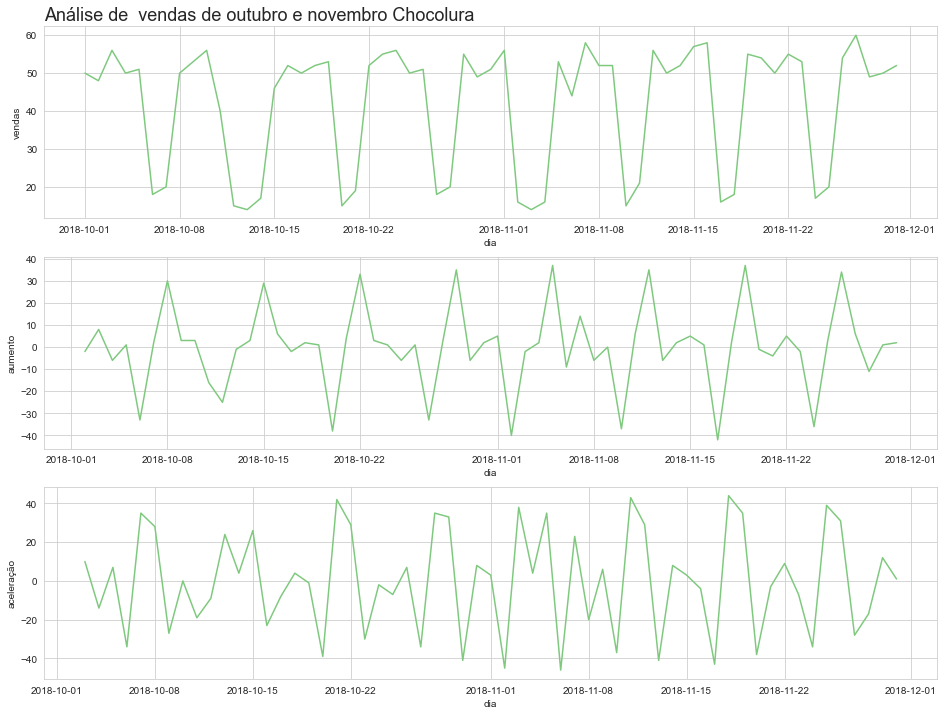

In [39]:
plot_comparar('dia', 'vendas', 'aumento', 'aceleração', dfv, 'Análise de  vendas de outubro e novembro Chocolura')

Visualizar por dia da semana seria mais fácil...

## Criando uma coluna nova: dia da semana

Analisando de onde vem a sazonalidade que pode ser visualizada no gráfico acima

In [40]:
dfv['dia_da_semana'] = dfv['dia'].dt.day_name()  # retorna o NOME do dia da semana em uma var datetime
dfv.head()

,dia,vendas,aumento,aceleração,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


### Traduzindo a coluna nova para PT-BR

In [41]:
dfv['dia_da_semana'] = dfv['dia_da_semana'].map({'Monday': 'segunda', 'Tuesday': 'terça', 'Wednesday': 'quarta', 
                          'Thursday': 'quinta', 'Friday': 'sexta', 'Saturday': 'sábado', 'Sunday': 'domingo'})
dfv

,dia,vendas,aumento,aceleração,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terça
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,segunda
57,2018-11-27,60,6.0,-28.0,terça
58,2018-11-28,49,-11.0,-17.0,quarta
59,2018-11-29,50,1.0,12.0,quinta


## Agrupando as médias (agrupando os dias)

In [42]:
vendas_agroup = dfv.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleração']].mean().round()
vendas_agroup

,vendas,aumento,aceleração
dia_da_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
sábado,16.0,-28.0,-20.0
terça,52.0,-1.0,-34.0


Ou seja, a sazonalidade acontece nos finais de semana

# Investigando a existência da correlação nas 3 variáveis

## Correlação das vendas diárias

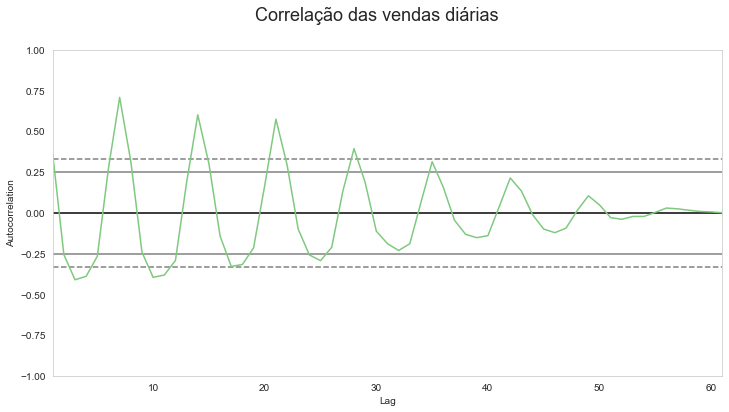

In [43]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize=18)
autocorrelation_plot(dfv['vendas'])
ax = ax

## Correlação do aumento das vendas diárias

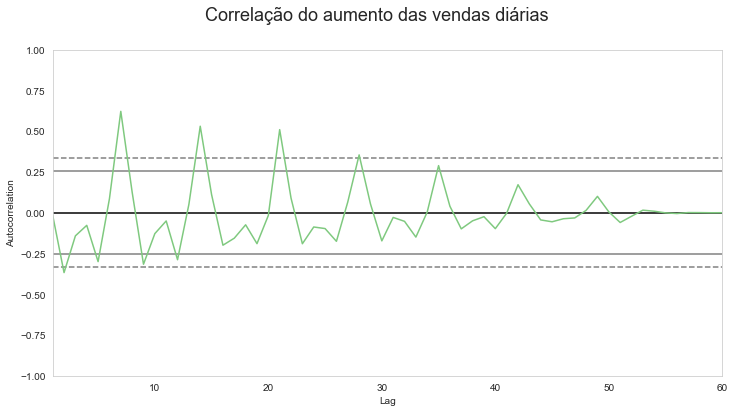

In [44]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18)
autocorrelation_plot(dfv['aumento'][1:])
ax = ax

## Correlação da aceleração das vendas diárias

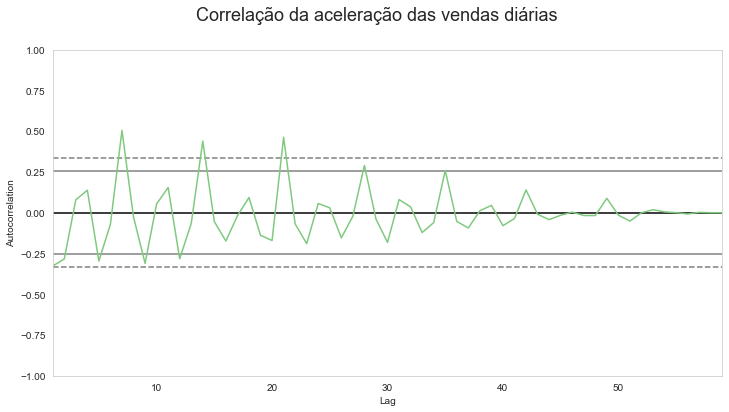

In [45]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18)
autocorrelation_plot(dfv['aceleração'][2:])
ax = ax

Nas três variáveis o coeficiente dde correlação é expressivo nos primeiros dias

# Análise: cafelura

Análise de vendas

In [46]:
dfcafe = pd.read_csv('dados/cafelura.csv')
dfcafe.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


## Análise inicial

In [47]:
# verificando os dtypes
dfcafe.dtypes

mes       object
vendas     int64
dtype: object

In [48]:
# to_datetime:
dfcafe['mes'] = pd.to_datetime(dfcafe['mes'])
dfcafe.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [49]:
# valores nulos e tamanho do DF:
print(f'Quantidade de linhas: {dfcafe.shape[0]}')
print(f'Quantidade de colunas: {dfcafe.shape[1]}')
print(f'Quantidade de dados nulos: {dfcafe.isna().sum().sum()}')

Quantidade de linhas: 24
Quantidade de colunas: 2
Quantidade de dados nulos: 0


## Plotando:

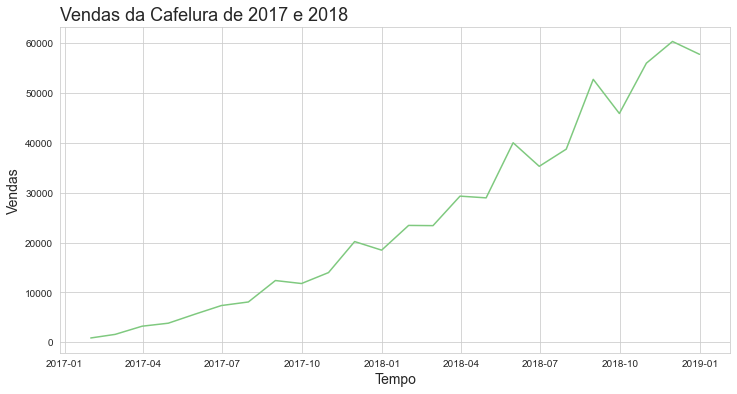

In [50]:
# Tempo x vendas
plotar('mes', 'vendas', dfcafe, 'Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas')

## Normalização de uma time-series

Normalizando a time-series da dfcafe, ou seja, removendo eventos específicos para identificar um padrão escondido

In [71]:
# DF de quantidade de dias de fds por cada mês
dffds = pd.read_csv('dados/dias_final_de_semana.csv')
dffds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [52]:
dffds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [53]:
# normalizando: 
dfcafe['vendas_normalizadas'] = dfcafe['vendas'] / dffds['quantidade_de_dias'].values
dfcafe.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


### Plotando

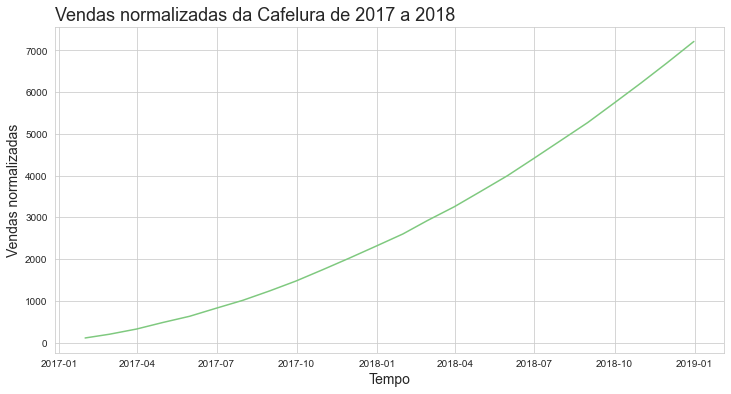

In [54]:
plotar('mes', 'vendas_normalizadas', dfcafe, 'Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas')

### Gráfico de comparação vendas x vendas normalizadas

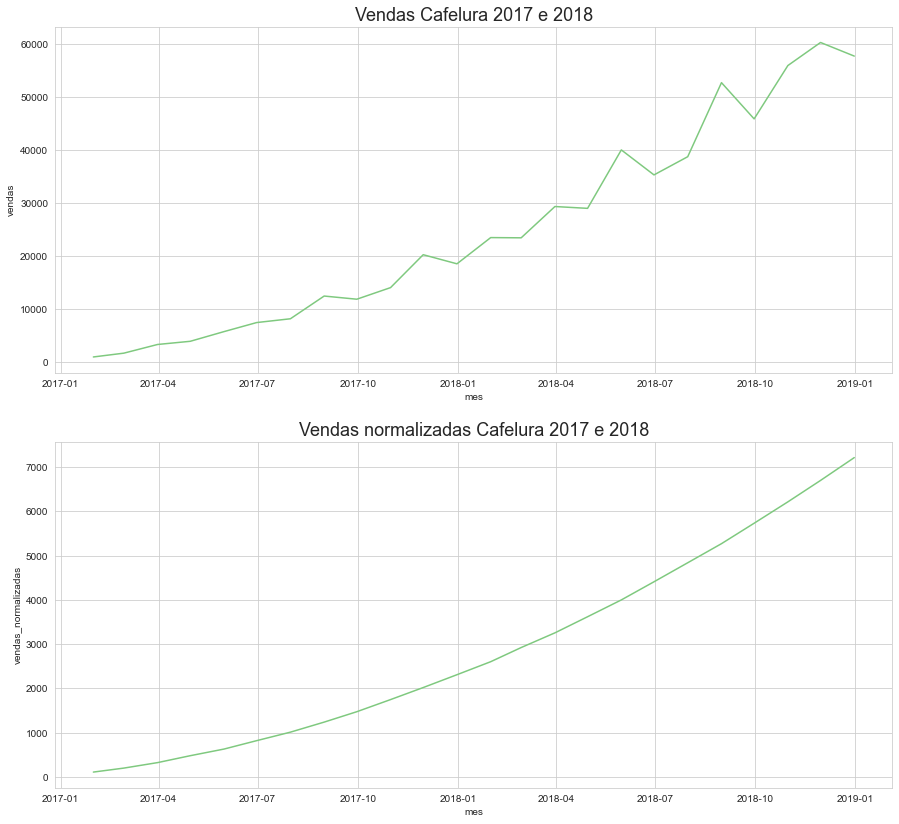

In [55]:
plt.figure(figsize=(15, 14))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=dfcafe)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=dfcafe)
ax = ax

# Statsmodels

Mostrando tendências, sazonaliadades e ruídos

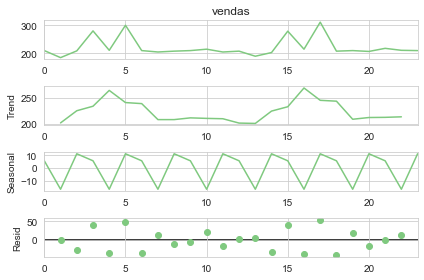

In [56]:
# importando a função:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(dfc['vendas'], period=3)
ax = resultado.plot()

### Dividindo o plot acima em 4 variáveis (uma pra cada)

E criando o novo DF com base nisso

In [73]:
# variáveis:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

# dicionário para criar o df depois:
data = ({
    'observação': observacao,
    'tendência': tendencia,
    'sazonalidade': sazonalidade,
    'ruído': ruido
})

# criando o DF com essas infos
dfre = pd.DataFrame(data)
dfre.head()

,observação,tendência,sazonalidade,ruído
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


## Plot comparação:

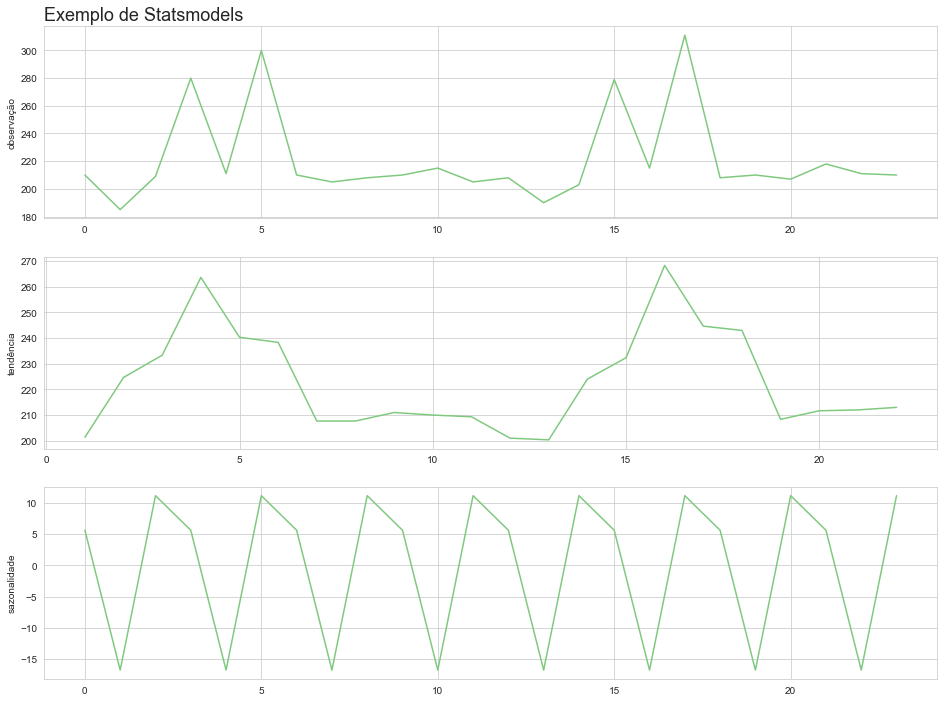

In [59]:
plot_comparar(dfre.index, 'observação', 'tendência', 'sazonalidade', dfre, 'Exemplo de Statsmodels')

# Análise: alucel

Análise de vendas

In [60]:
# importando o DF:
dfacel = pd.read_csv('dados/alucel.csv')
dfacel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


## Análise e manipulação inicial:

### Verificando o dtype e convertendo para datetime:

In [61]:
dfacel.dtypes

dia        object
vendas    float64
dtype: object

In [62]:
dfacel['dia'] = pd.to_datetime(dfacel['dia'])
dfacel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

### Verificando dados nulos e tamanho do DF:

In [63]:
# valores nulos e tamanho do DF:
print(f'Quantidade de linhas: {dfacel.shape[0]}')
print(f'Quantidade de colunas: {dfacel.shape[1]}')
print(f'Quantidade de dados nulos: {dfacel.isna().sum().sum()}')

Quantidade de linhas: 61
Quantidade de colunas: 2
Quantidade de dados nulos: 0


### Decompondo com diff():

In [64]:
dfacel['aumento'] = dfacel['vendas'].diff()
dfacel['aceleração'] = dfacel['aumento'].diff()
dfacel.head()

,dia,vendas,aumento,aceleração
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


## Plotando

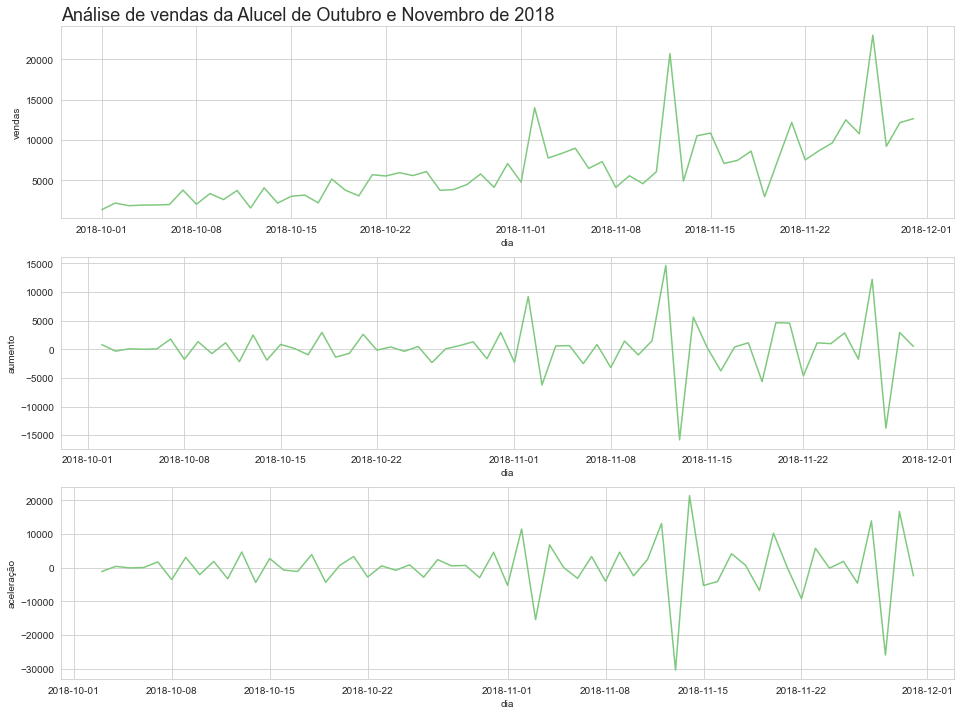

In [65]:
plot_comparar('dia', 'vendas', 'aumento', 'aceleração', dfacel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

Gráfico com bastante ruído -> será necessária a normalização

## Normalizando a análise com Média móvel:

Removendo ruído com média móvel

### Média móvel de 7 dias:

In [66]:
dfacel['media_movel'] = dfacel['vendas'].rolling(7).mean()
dfacel.head(15)

,dia,vendas,aumento,aceleração,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


#### Plotando

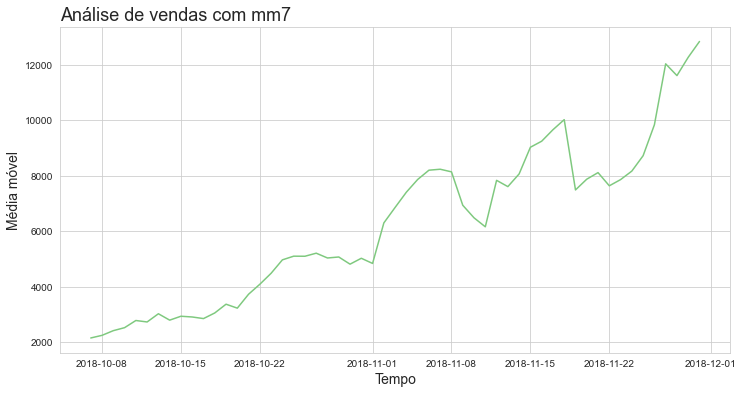

In [67]:
plotar('dia', 'media_movel', dfacel, 'Análise de vendas com mm7', 'Tempo', 'Média móvel')

### Média móvel de 21 dias:

In [68]:
dfacel['media_movel_21'] = dfacel['vendas'].rolling(21).mean()

#### Plotando:

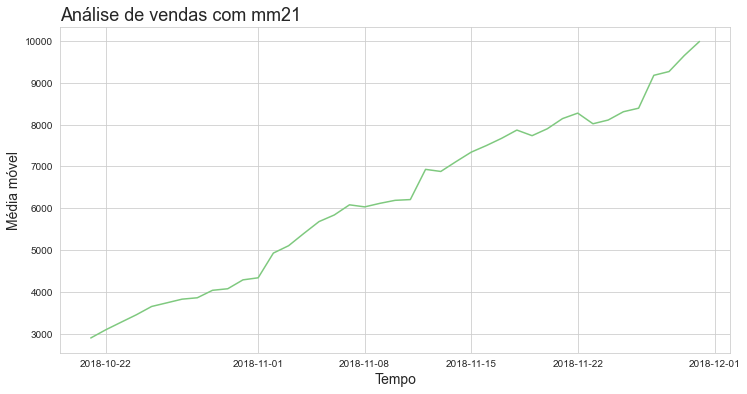

In [69]:
plotar('dia', 'media_movel_21', dfacel, 'Análise de vendas com mm21', 'Tempo', 'Média móvel')

### Plotando a comparação

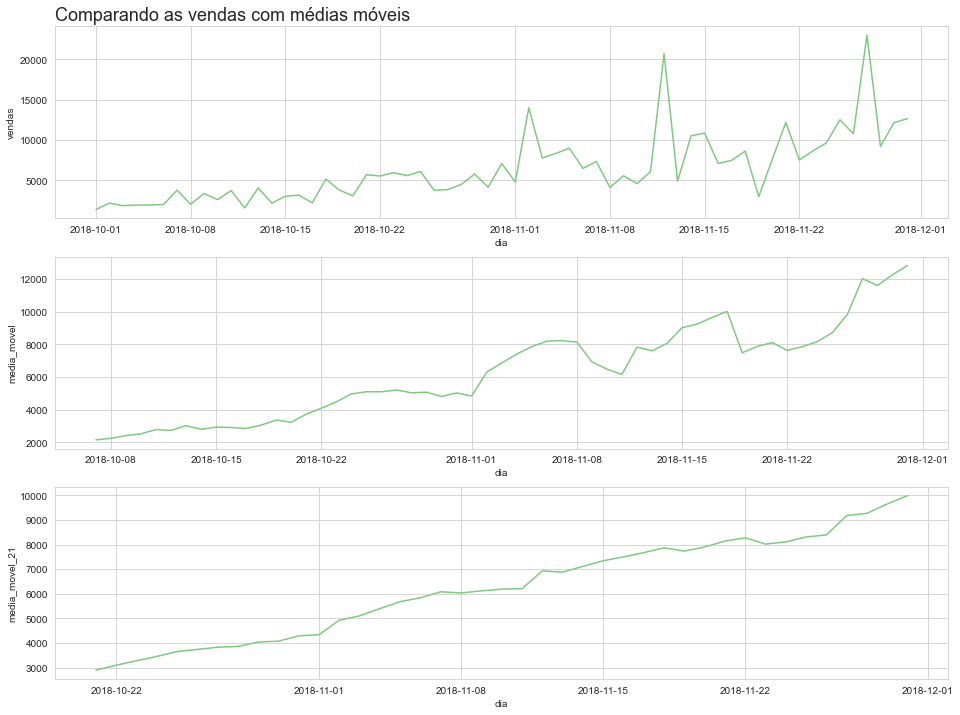

In [70]:
plot_comparar('dia', 'vendas', 'media_movel', 'media_movel_21', dfacel, 'Comparando as vendas com médias móveis')